In [19]:
#Import libraries
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import ast
import seaborn as sns
from adjustText import adjust_text

#Load the CSV file into a DataFrame
df = pd.read_csv('lego_sets.csv')

#Clean data
df.drop(columns=['bricksetURL', 'thumbnailURL', 'imageURL'], inplace=True)
df['pieces'] = df['pieces'].fillna(0).astype(int)
df['minifigs'] = df['minifigs'].fillna(0).astype(int)
df['year'] = df['year'].astype(int)
df['pieces'] = df['pieces'].astype(int)
df['minifigs'] = df['minifigs'].astype(int)
df['US_retailPrice'] = pd.to_numeric(df['US_retailPrice'], errors='coerce')
df['US_retailPrice'] = df['US_retailPrice'].fillna(0)
df['agerange_min'] = df['agerange_min'].fillna(0)

#Create new df with missing values removed from relevant columns
df_full = df[(df['pieces'] > 0) & (df['minifigs'] > 0) & (df['US_retailPrice'] > 0)]

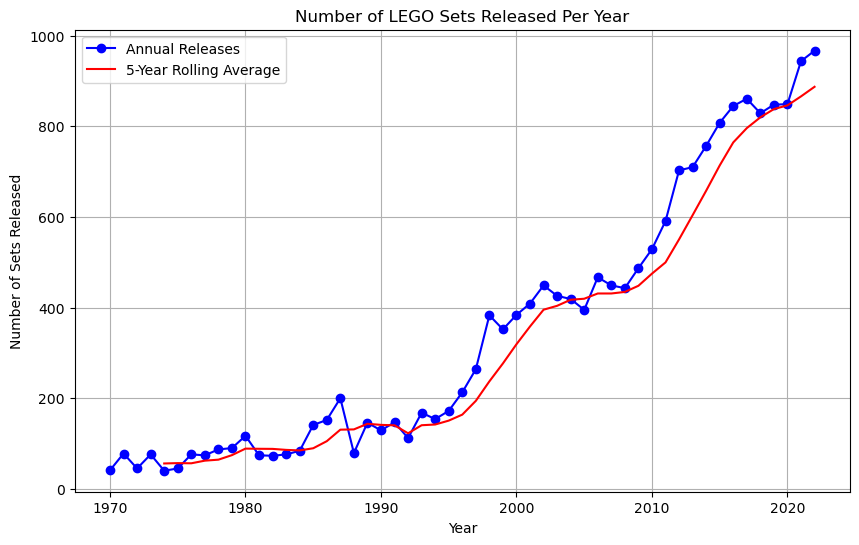

In [25]:
# Calculate a rolling average to smooth out short-term fluctuations
sets_per_year = df.groupby('year').size()
sets_per_year_rolling = sets_per_year.rolling(window=5).mean()

# Plot the rolling average trend
plt.figure(figsize=(10, 6))
sets_per_year.plot(kind='line', marker='o', color='b', label='Annual Releases')
sets_per_year_rolling.plot(kind='line', color='r', label='5-Year Rolling Average')
plt.title('Number of LEGO Sets Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sets Released')
plt.legend()
plt.grid(True)
plt.show()

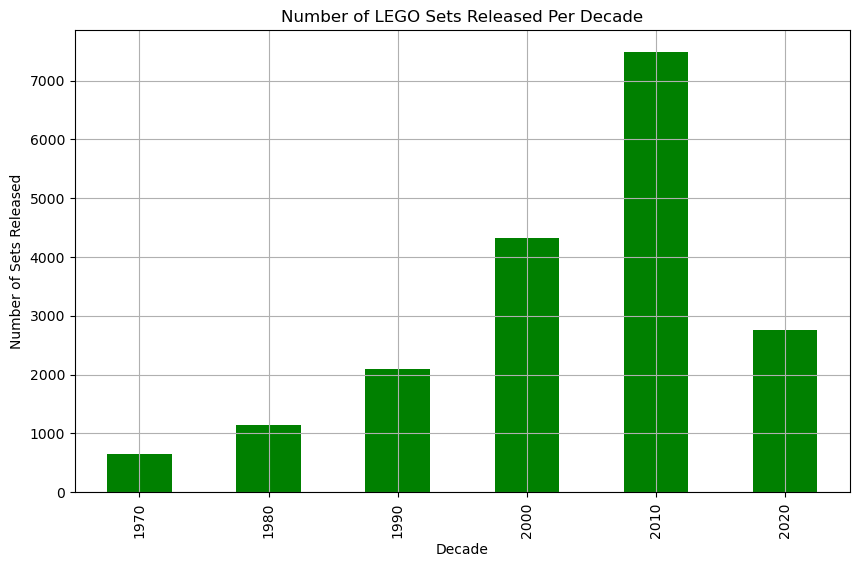

In [26]:
# Create a new column for decade
df['decade'] = (df['year'] // 10) * 10

# Count the number of sets released each decade
sets_per_decade = df.groupby('decade').size()

# Plot the decade trend
plt.figure(figsize=(10, 6))
sets_per_decade.plot(kind='bar', color='green')
plt.title('Number of LEGO Sets Released Per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Sets Released')
plt.grid(True)
plt.show()